ID: V01053626

Name: Newsha Bahardoost

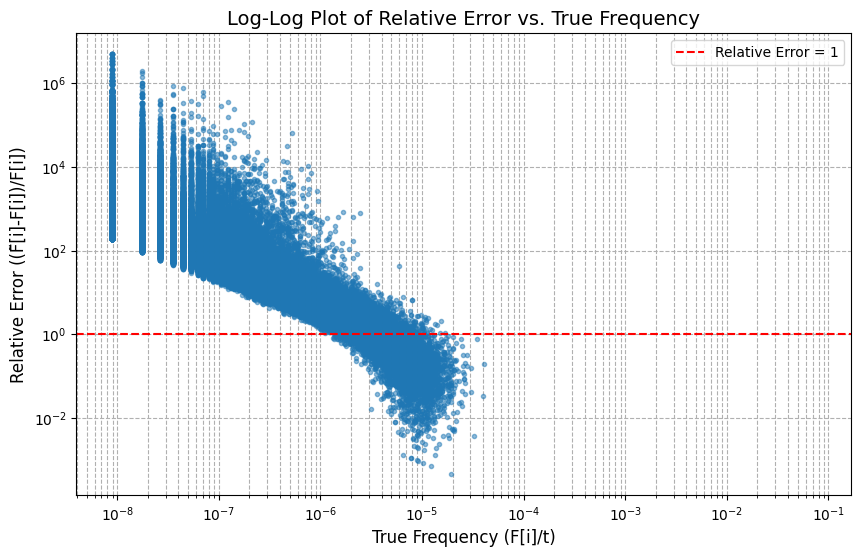

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Task 1
STREAM_FILE = "/content/p4-words-stream.txt"       # "data/p4-words-stream.txt"
COUNTS_FILE = "/content/p4-counts.txt"             # "data/p4-counts.txt"
HASH_PARAMS_FILE = "/content/p4-hash-params.txt"

# === PARAMETERS ===
delta = np.exp(-5)     # δ = e^-5
epsilon = np.e * 1e-4  # ε = e×10^-4
num_hash = int(np.log(1 / delta))  # 5 hash functions
num_buckets = int(np.ceil(np.e / epsilon))  # 2719 buckets
p = 123457  # Prime for hashing

# === LOAD HASH PARAMETERS ===
hash_params = []
with open(HASH_PARAMS_FILE, "r") as f:
    for line in f:
        a, b = map(int, line.strip().split("\t"))
        hash_params.append((a, b))

# === INITIALIZE Count-Min Sketch ===
count_sketch = np.zeros((num_hash, num_buckets), dtype=np.int32)

# === PROCESS STREAM ===
total_words = 0
with open(STREAM_FILE, "r") as f:
    for line in f:
        word_id = int(line.strip())
        total_words += 1
        for j in range(num_hash):
            a, b = hash_params[j]
            y = word_id % p
            hash_val = (a * y + b) % p
            bucket = hash_val % num_buckets
            count_sketch[j, bucket] += 1

# === LOAD EXACT COUNTS ===
exact_counts = {}
with open(COUNTS_FILE, "r") as f:
    for line in f:
        word, count = map(int, line.strip().split("\t"))
        exact_counts[word] = count

# === COMPUTE RELATIVE ERRORS ===
relative_errors = []
freqs = []
for word, true_count in exact_counts.items():
    estimates = []
    for j in range(num_hash):
        a, b = hash_params[j]
        y = word % p
        hash_val = (a * y + b) % p
        bucket = hash_val % num_buckets
        estimates.append(count_sketch[j, bucket])
    est_count = min(estimates)
    rel_error = (est_count - true_count) / true_count
    relative_errors.append(rel_error)
    freqs.append(true_count / total_words)

# === PLOT ===
plt.figure(figsize=(10, 6))
plt.loglog(freqs, relative_errors, "o", alpha=0.5, markersize=3)
plt.xlabel("True Frequency (F[i]/t)", fontsize=12)
plt.ylabel("Relative Error ((F̃[i]-F[i])/F[i])", fontsize=12)
plt.title("Log-Log Plot of Relative Error vs. True Frequency", fontsize=14)
plt.grid(True, which="both", linestyle="--")
plt.axhline(y=1, color="r", linestyle="--", label="Relative Error = 1")
plt.legend()
plt.show()


Task 2:
 To keep the relative error below 1 (or under 100%), a word needs to appear frequently enough in the document. Based on the plot, this happens when the true frequency (i.e., the number of times a word appears divided by the total number of words in the stream) is at least around **\( 10^{-5} \)**.  
In simpler terms, words that occur more often tend to have much more accurate count estimates.
